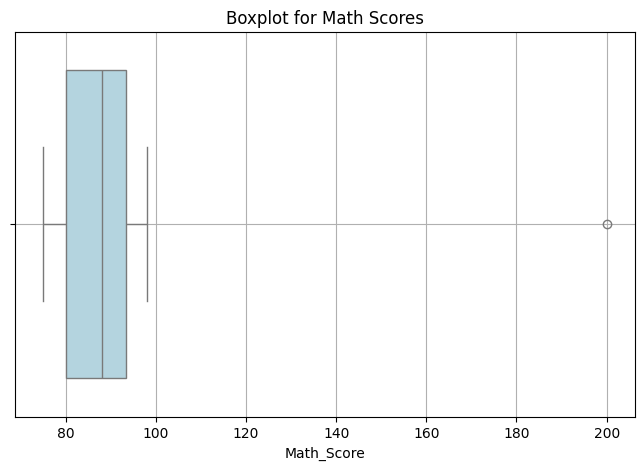

    Math_Score  Z-Score_Outlier  IQR_Outlier  Any_Outlier
0           78            False        False        False
1           85            False        False        False
2           90            False        False        False
3           95            False        False        False
4           88            False        False        False
5           76            False        False        False
6           94            False        False        False
7           98            False        False        False
8          200             True         True         True
9           77            False        False        False
10          82            False        False        False
11          86            False        False        False
12          93            False        False        False
13          75            False        False        False
14          89            False        False        False


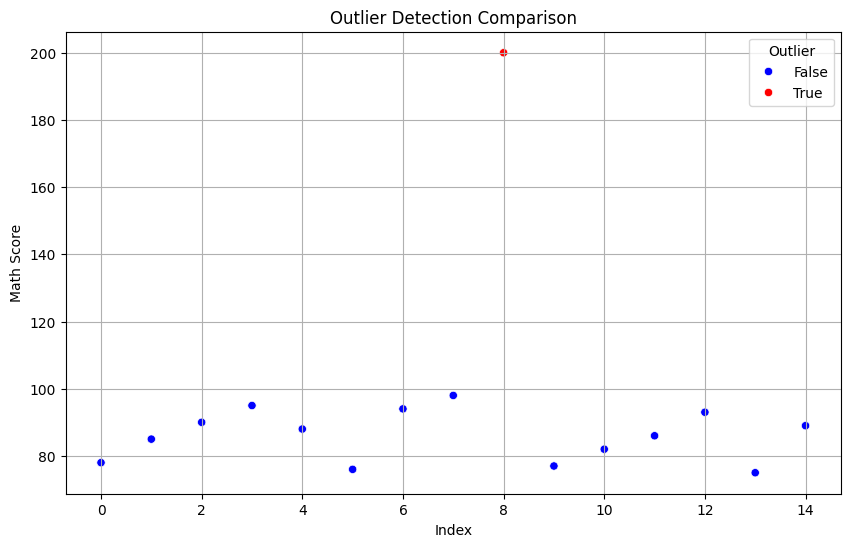

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Sample dataset
data = {
    'Math_Score': [78, 85, 90, 95, 88, 76, 94, 98, 200, 77, 82, 86, 93, 75, 89]
}
df = pd.DataFrame(data)

# Z-Score Method
z_scores = np.abs(stats.zscore(df['Math_Score']))
df['Z-Score_Outlier'] = z_scores > 2  # Flag if Z-score > 2

# IQR Method
Q1 = df['Math_Score'].quantile(0.25)
Q3 = df['Math_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['IQR_Outlier'] = (df['Math_Score'] < lower_bound) | (df['Math_Score'] > upper_bound)

# Boxplot Method (Using Seaborn)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Math_Score'], color='lightblue')
plt.title('Boxplot for Math Scores')
plt.grid(True)
plt.show()

# Combining Results
df['Any_Outlier'] = df['Z-Score_Outlier'] | df['IQR_Outlier']

# Display the dataframe with outlier flags
print(df[['Math_Score', 'Z-Score_Outlier', 'IQR_Outlier', 'Any_Outlier']])

# Visualize combined results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=np.arange(len(df)), y='Math_Score', hue='Any_Outlier', palette={True: 'red', False: 'blue'})
plt.title('Outlier Detection Comparison')
plt.xlabel('Index')
plt.ylabel('Math Score')
plt.legend(title='Outlier')
plt.grid(True)
plt.show()
